In [1]:
import numpy as np
import pylab as plt
import networkx as nx

/Users/eyortucboylu/.local/share/virtualenvs/q_learning-h8gInF-b/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


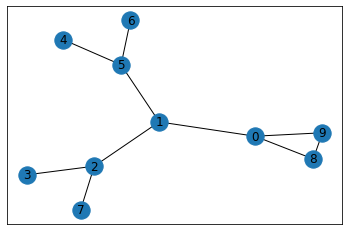

In [2]:
# map cell to cell, add circular cell to goal point
goal = 4
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7), (8, 0), (9, 0), (9, 8)]


G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
# how many points in graph? x points
MATRIX_SIZE = len(points_list)

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [4]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)
(8, 0)
(9, 0)
(9, 8)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,   0.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1., 100.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1., 100.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.]])

In [6]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 9

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)
  
    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

In [8]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

max_value 255.60385918742878
Score: 1248.4567413830641
max_value 204.02628747544676
Score: 1248.4567413830641
max_value 399.3810299803574
Score: 1248.4567413830641
max_value 255.60385918742878
Score: 1248.4567413830641
max_value 319.50482398428596
Score: 1248.4567413830641
max_value 499.3810299803574
Score: 1248.1008706905989
max_value 399.50482398428596
Score: 1248.1256601792852
max_value 255.60385918742878
Score: 1248.1256601792852
max_value 255.60385918742878
Score: 1248.1256601792852
max_value 399.50482398428596
Score: 1248.1256601792852
max_value 399.50482398428596
Score: 1248.1504496679715
max_value 204.48308734994305
Score: 1248.2419228812241
max_value 399.50482398428596
Score: 1248.2667123699105
max_value 319.6038591874288
Score: 1248.2865439608595
max_value 255.60385918742878
Score: 1248.2865439608595
max_value 255.60385918742878
Score: 1248.2865439608595
max_value 319.6038591874288
Score: 1248.3063755518085
max_value 319.6038591874288
Score: 1248.3262071427575
max_value 255.6

Score: 1248.0605679811918
max_value 319.68308734994304
Score: 1248.0605679811918
max_value 499.91692325026355
Score: 1248.0911505080499
max_value 319.68308734994304
Score: 1248.0911505080499
max_value 204.59717590396357
Score: 1248.0911505080499
max_value 204.59717590396357
Score: 1248.0911505080499
max_value 255.74646987995445
Score: 1248.0911505080499
max_value 499.91692325026355
Score: 1248.0953050358262
max_value 399.93353860021085
Score: 1248.1612518756808
max_value 255.74646987995445
Score: 1248.1612518756808
max_value 204.59717590396357
Score: 1248.1612518756808
max_value 399.93353860021085
Score: 1248.1612518756808
max_value 204.59717590396357
Score: 1248.1612518756808
max_value 255.74646987995445
Score: 1248.1612518756808
max_value 399.93353860021085
Score: 1248.1612518756808
max_value 399.93353860021085
Score: 1248.1612518756808
max_value 399.93353860021085
Score: 1248.2271987155355
max_value 399.93353860021085
Score: 1248.2271987155355
max_value 255.74646987995445
Score: 124

Score: 1248.8022010915688
max_value 255.99107970192068
Score: 1248.8022010915688
max_value 204.79286376153655
Score: 1248.804258364676
max_value 255.99107970192068
Score: 1248.8531810273166
max_value 204.79286376153655
Score: 1248.8923191574293
max_value 499.9942910092293
Score: 1248.8890396121599
max_value 399.99286376153657
Score: 1248.8890396121599
max_value 399.99286376153657
Score: 1248.8890396121599
max_value 319.98884962740084
Score: 1248.8922540922135
max_value 255.99107970192068
Score: 1248.8922540922135
max_value 204.79286376153655
Score: 1248.8922540922135
max_value 255.99107970192068
Score: 1248.8948256762567
max_value 204.79286376153655
Score: 1248.8948256762567
max_value 399.99286376153657
Score: 1248.8948256762567
max_value 255.99107970192068
Score: 1248.8948256762567
max_value 319.9942910092293
Score: 1248.8948256762567
max_value 204.79286376153655
Score: 1248.9339636946484
max_value 255.99107970192068
Score: 1248.9339636946484
max_value 204.79286376153655
Score: 1248.9

Most efficient path:
[7, 2, 1, 5, 4]


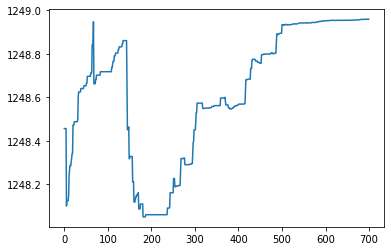

In [11]:
# Testing
current_state = 7
steps = [current_state]

while current_state != goal:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()